In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
df = pd.read_csv(url)



In [2]:
# Display the first few rows of the dataset to understand its structure
print(df.head())




   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
0  2.536088  0.068600  0.046527     0.055703         1724      0
1  2.437283  0.403030  0.178079     0.231339         1674      0
2  2.631475  0.000000  0.000000     0.000000         1423      0
3  2.930899  0.744501  0.761118     0.507351         1867      0
4  4.449604  0.735550  3.596202     0.999931         2973      0


In [3]:
# Check the data types and basic statistics of the numerical columns
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   etpSrcIP     718 non-null    float64
 1   etpSrcP      718 non-null    float64
 2   etpDstP      718 non-null    float64
 3   etpProtocol  718 non-null    float64
 4   totalPacket  718 non-null    int64  
 5   label        718 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 33.8 KB
None
         etpSrcIP     etpSrcP     etpDstP  etpProtocol    totalPacket  \
count  718.000000  718.000000  718.000000   718.000000     718.000000   
mean     8.263882    0.924619    0.700327     0.328038  455704.774373   
std      4.671150    0.544394    0.727217     0.187771  391359.488987   
min      2.292760    0.000000    0.000000     0.000000    1223.000000   
25%      2.597673    0.365440    0.172157     0.216382    1863.000000   
50%     12.016391    1.275059    0.767632     0.365121  708984.500

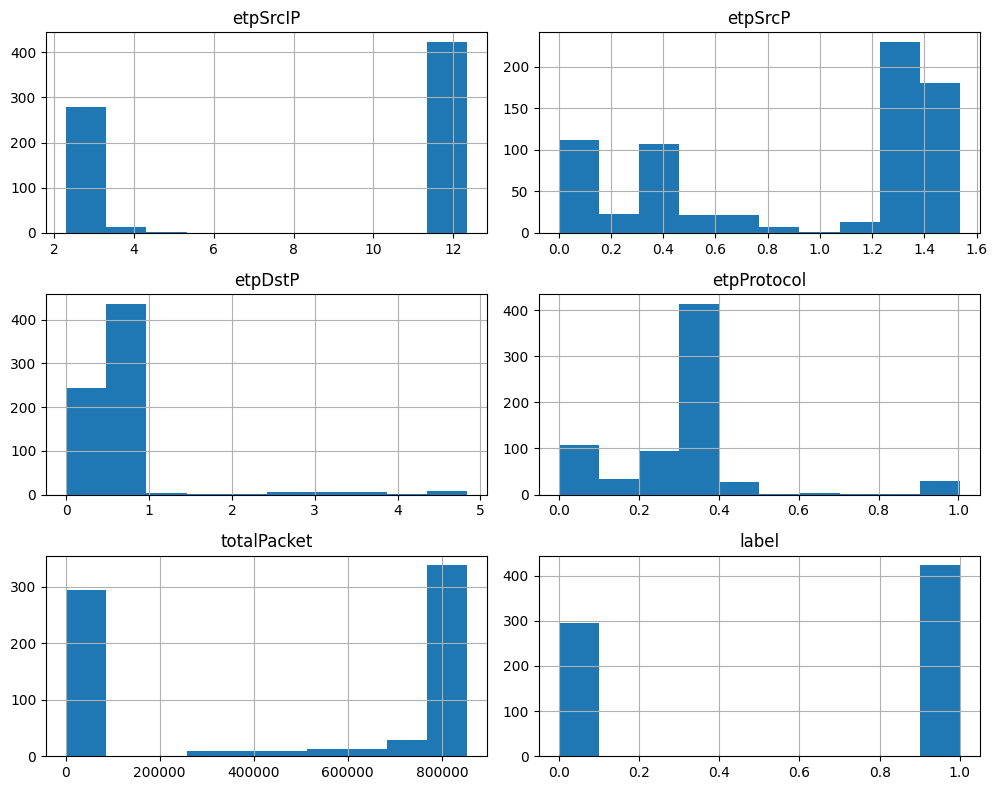

In [4]:
# Data Visualization
# Plotting histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



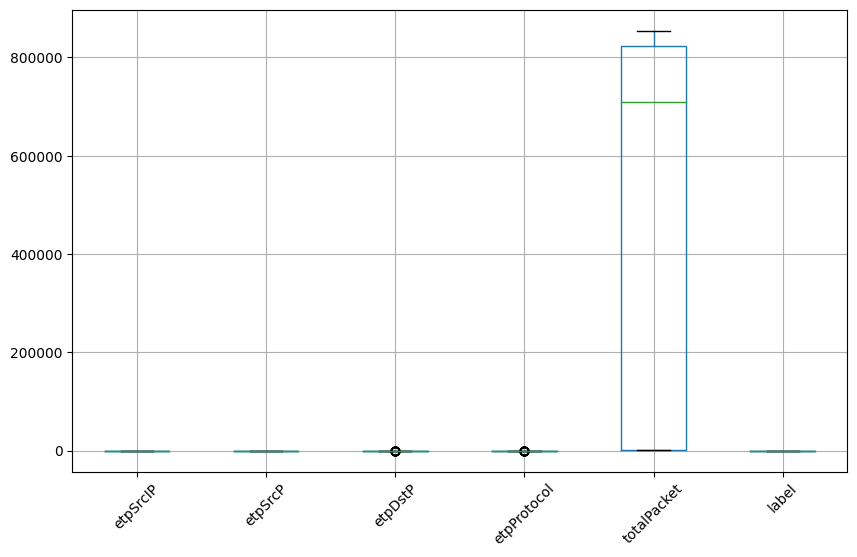

In [5]:
# Boxplot for numerical features
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

# You can also create other types of plots like scatter plots, bar plots, etc. based on your analysis needs

In [6]:
import numpy as np

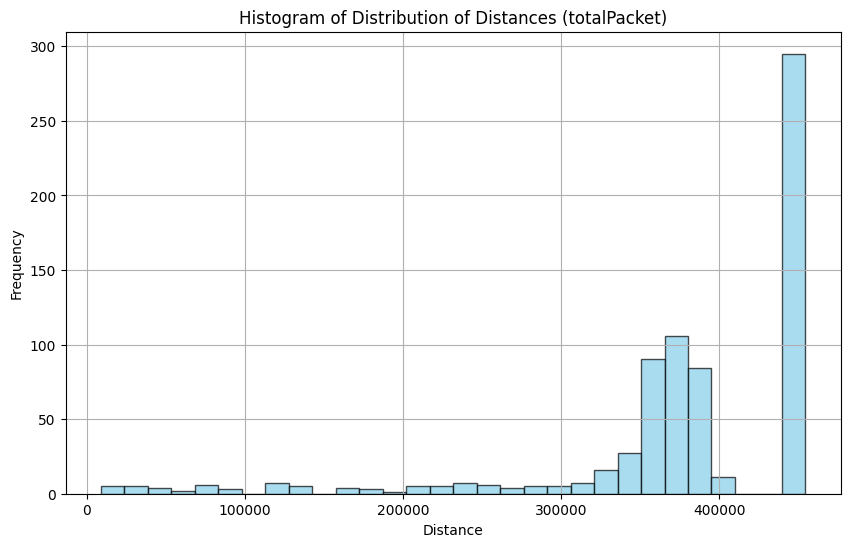

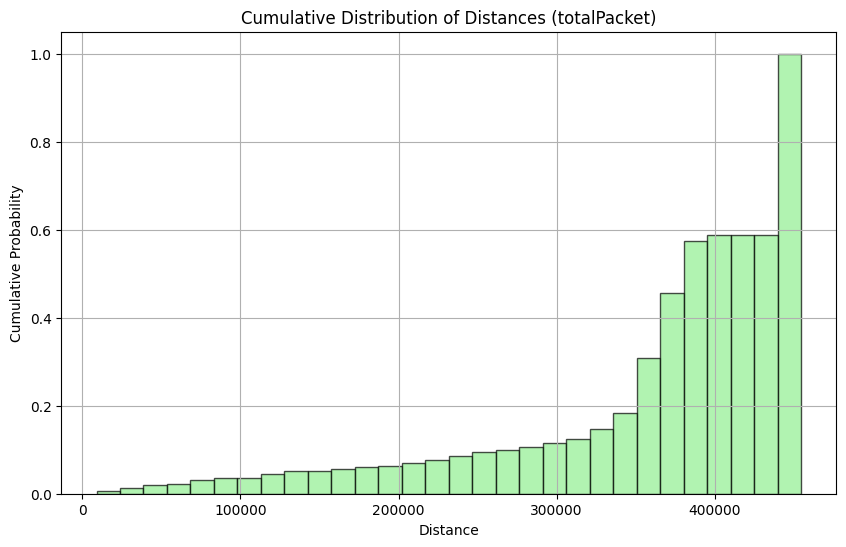

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Load the dataset
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
# df = pd.read_csv(url)

# Selecting the feature for distance calculation
feature = 'totalPacket'

# Calculate distances
distances = np.abs(df[feature] - df[feature].mean())

# Plotting histogram of the distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Distribution of Distances (' + feature + ')')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting cumulative distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='lightgreen', edgecolor='black', alpha=0.7, cumulative=True, density=True)
plt.title('Cumulative Distribution of Distances (' + feature + ')')
plt.xlabel('Distance')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
df = pd.read_csv(url)

# Drop the 'label' column for now
df.drop('label', axis=1, inplace=True)

# Calculate and store the mean and standard deviation for each dimension
mean_std_dict = {}
for col in df.columns:
    mean_std_dict[col] = (df[col].mean(), df[col].std())

# Define the function for normalization using tanh-estimator method
def normalize_with_tanh_estimator(data, mean_std_dict):
    normalized_data = pd.DataFrame()
    for col in data.columns:
        mu, sigma = mean_std_dict[col]
        normalized_col = 0.5 * (np.tanh(0.1 * ((data[col] - mu) / sigma)) + 1)
        normalized_data[col] = normalized_col
    return normalized_data

# Normalize the dataset using tanh-estimator method
normalized_df = normalize_with_tanh_estimator(df, mean_std_dict)

# Display the first few rows of the normalized dataset
print(normalized_df.head())

# Store mean_std_dict for later use in real-time operation
# You can save it to a file or store it in memory, depending on your requirements


   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket
0  0.438995  0.422020  0.455169     0.427986     0.442258
1  0.437954  0.452241  0.464154     0.474274     0.442252
2  0.440001  0.415885  0.451997     0.413527     0.442220
3  0.443162  0.483463  0.504180     0.547603     0.442276
4  0.459262  0.482642  0.689210     0.671649     0.442416


In [9]:
mean_std_dict

{'etpSrcIP': (8.263881658687838, 4.671149926162893),
 'etpSrcP': (0.9246188369475715, 0.5443941383426818),
 'etpDstP': (0.7003273029028211, 0.7272171514281917),
 'etpProtocol': (0.3280379809243417, 0.18777105312169787),
 'totalPacket': (455704.77437325905, 391359.48898741446)}

In [10]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=34aab3801facc33b8c6b26b21f3f3a07bd721295a8115b5f63d479844b07ae16
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [11]:
from minisom import MiniSom
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'label' is the target variable in the original dataset
df = pd.read_csv(url)
X = normalized_df.values
y = df['label'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SOM
som_size = int(np.sqrt(5 * np.sqrt(X_train.shape[0])))  # heuristic for SOM size
som = MiniSom(som_size, som_size, X_train.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(X_train, 1000)  # training with 1000 iterations

# Map training data to their closest SOM neurons
X_train_som = np.array([som.winner(x) for x in X_train])
X_test_som = np.array([som.winner(x) for x in X_test])

# Flatten SOM coordinates to use in k-NN
X_train_som_flat = np.array([x[0] * som_size + x[1] for x in X_train_som])
X_test_som_flat = np.array([x[0] * som_size + x[1] for x in X_test_som])

# k-NN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_som_flat.reshape(-1, 1), y_train)

# Predictions and Evaluation
y_pred = knn.predict(X_test_som_flat.reshape(-1, 1))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        80

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

